# Primer implementacion de modelo:

## Similitud Coseno:

Con el objetivo de en base a los parametros de entrada encontrar los 10 business id mas parecidos en cuanto a caracteristicas y ofrecer una idea del volumen de estrellas a recibir por la idea de negocio

### Import libraries:

In [184]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

### Print set Options:

In [185]:

# Configura la visualización para mostrar todas las columnas
pd.set_option('display.max_columns', None)

# Configura la visualización para mostrar todas las filas
pd.set_option('display.max_rows', None)

# Configura la visualización para imprimir todo el contenido de las columnas
pd.set_option('display.max_colwidth', None)


### importo categories ine hot eda_yelp_business_one_hot: Secondary dataframe:
a modo de suplementar la data, considero importante el listado de las 100 categorias principales, veremos de ir ajustando este numero en base a necesidades, o incluso pivotearemos hacia otro camino...

In [186]:
Datasets_ML_eda_yelp_business_one_hot = pd.read_parquet('../../../ML_datasets/Datasets_ML_eda_yelp_business_one_hot.parquet')

In [187]:
Datasets_ML_eda_yelp_business_one_hot.head()

,business_id,name,city,stars,review_count,Restaurants,Food,Shopping,Beauty & Spas,Nightlife,Bars,Health & Medical,Home Services,Local Services,Event Planning & Services,Automotive,Sandwiches,American (Traditional),Active Life,Pizza,Coffee & Tea,Fast Food,Breakfast & Brunch,American (New),Burgers,Fashion,Home & Garden,Arts & Entertainment,Hair Salons,Auto Repair,Italian,Mexican,Nail Salons,Specialty Food,Hotels & Travel,Seafood,Doctors,Hair Removal,Chinese,Fitness & Instruction,Grocery,Desserts,Salad,Bakeries,Chicken Wings,Hotels,Real Estate,Cafes,Ice Cream & Frozen Yogurt,Skin Care,Caterers,Venues & Event Spaces,Wine & Spirits,Beer,Delis,Dentists,Waxing,Tires,Sports Bars,Professional Services,Women's Clothing,Oil Change Stations,Massage,Day Spas,Convenience Stores,General Dentistry,Japanese,Pubs,Flowers & Gifts,Home Decor,Gyms,Contractors,Sushi Bars,Cocktail Bars,Auto Parts & Supplies,Juice Bars & Smoothies,Barbeque,Barbers,Drugstores,Sporting Goods,Accessories,Cosmetic Dentists,Apartments,Furniture Stores,Asian Fusion,Steakhouses,Diners,Cosmetics & Beauty Supply,Jewelry,Education,Local Flavor,Department Stores,Hair Stylists,Trainers,Arts & Crafts,Electronics,Car Dealers,Massage Therapy,Mediterranean,Men's Clothing,Eyelash Service,Lounges,Wine Bars,Vegetarian,Music Venues,IT Services & Computer Repair,Donuts,Optometrists,Soup,Medical Centers,Laundry Services,Body Shops,Gas Stations,Pets,Dry Cleaning & Laundry,Shoe Stores,Tacos,Eyewear & Opticians,Southern,Thai,Music & Video,Mags,Books,Heating & Air Conditioning/HVAC,Food Delivery Services,Parks,Party & Event Planning,Tex-Mex,Cajun/Creole,Makeup Artists,Mobile Phones,Yoga,Building Supplies,Florists,Beer Bar,Food Trucks,Breweries,Vietnamese,Nurseries & Gardening,Discount Store,Indian,Plumbing,Vegan,Men's Hair Salons,Appliances,Chicken Shop,Latin American,Greek,Hardware Stores,Art Galleries,Gluten-Free,Gift Shops,Medical Spas,Hot Dogs,Sewing & Alterations,Printing Services,Car Wash,Vintage & Consignment,Comfort Food,Used,Bagels,Specialty Schools,Pet Services,Oral Surgeons,Public Services & Government,Auto Detailing,Kitchen & Bath,Self Storage,Chiropractors,Shipping Centers,Tobacco Shops,Endodontists,Movers,Ethnic Food,Tanning,Orthodontists,Dive Bars,Buffets,Auto Glass Services,Real Estate Services,Antiques,Cheesesteaks,Mattresses,Hair Extensions,Appliances & Repair,Property Management,Thrift Stores,Health Markets,Tattoo,Middle Eastern,Caribbean,Wedding Planning,Landscaping,Transmission Repair,Sports Wear,Meat Shops,Hobby Shops,Financial Services,Tours,Towing,Soul Food,Home Cleaning,Fruits & Veggies,Performing Arts,Bridal
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,Philadelphia,4.0,80,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,Green Lane,4.5,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,Ashland City,2.0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

#### Elimino colunmas que ya poseo en ML_promedios_final:

In [188]:
# Lista de columnas a eliminar
columns_to_drop = ['name', 'city', 'stars', 'review_count']

# Eliminar las columnas especificadas
Datasets_ML_eda_yelp_business_one_hot.drop(columns=columns_to_drop, inplace=True)


In [189]:
Datasets_ML_eda_yelp_business_one_hot.head()

,business_id,Restaurants,Food,Shopping,Beauty & Spas,Nightlife,Bars,Health & Medical,Home Services,Local Services,Event Planning & Services,Automotive,Sandwiches,American (Traditional),Active Life,Pizza,Coffee & Tea,Fast Food,Breakfast & Brunch,American (New),Burgers,Fashion,Home & Garden,Arts & Entertainment,Hair Salons,Auto Repair,Italian,Mexican,Nail Salons,Specialty Food,Hotels & Travel,Seafood,Doctors,Hair Removal,Chinese,Fitness & Instruction,Grocery,Desserts,Salad,Bakeries,Chicken Wings,Hotels,Real Estate,Cafes,Ice Cream & Frozen Yogurt,Skin Care,Caterers,Venues & Event Spaces,Wine & Spirits,Beer,Delis,Dentists,Waxing,Tires,Sports Bars,Professional Services,Women's Clothing,Oil Change Stations,Massage,Day Spas,Convenience Stores,General Dentistry,Japanese,Pubs,Flowers & Gifts,Home Decor,Gyms,Contractors,Sushi Bars,Cocktail Bars,Auto Parts & Supplies,Juice Bars & Smoothies,Barbeque,Barbers,Drugstores,Sporting Goods,Accessories,Cosmetic Dentists,Apartments,Furniture Stores,Asian Fusion,Steakhouses,Diners,Cosmetics & Beauty Supply,Jewelry,Education,Local Flavor,Department Stores,Hair Stylists,Trainers,Arts & Crafts,Electronics,Car Dealers,Massage Therapy,Mediterranean,Men's Clothing,Eyelash Service,Lounges,Wine Bars,Vegetarian,Music Venues,IT Services & Computer Repair,Donuts,Optometrists,Soup,Medical Centers,Laundry Services,Body Shops,Gas Stations,Pets,Dry Cleaning & Laundry,Shoe Stores,Tacos,Eyewear & Opticians,Southern,Thai,Music & Video,Mags,Books,Heating & Air Conditioning/HVAC,Food Delivery Services,Parks,Party & Event Planning,Tex-Mex,Cajun/Creole,Makeup Artists,Mobile Phones,Yoga,Building Supplies,Florists,Beer Bar,Food Trucks,Breweries,Vietnamese,Nurseries & Gardening,Discount Store,Indian,Plumbing,Vegan,Men's Hair Salons,Appliances,Chicken Shop,Latin American,Greek,Hardware Stores,Art Galleries,Gluten-Free,Gift Shops,Medical Spas,Hot Dogs,Sewing & Alterations,Printing Services,Car Wash,Vintage & Consignment,Comfort Food,Used,Bagels,Specialty Schools,Pet Services,Oral Surgeons,Public Services & Government,Auto Detailing,Kitchen & Bath,Self Storage,Chiropractors,Shipping Centers,Tobacco Shops,Endodontists,Movers,Ethnic Food,Tanning,Orthodontists,Dive Bars,Buffets,Auto Glass Services,Real Estate Services,Antiques,Cheesesteaks,Mattresses,Hair Extensions,Appliances & Repair,Property Management,Thrift Stores,Health Markets,Tattoo,Middle Eastern,Caribbean,Wedding Planning,Landscaping,Transmission Repair,Sports Wear,Meat Shops,Hobby Shops,Financial Services,Tours,Towing,Soul Food,Home Cleaning,Fruits & Veggies,Performing Arts,Bridal
0,MTSW4McQd7CbVtyjqoe9mw,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,mWMc6_wTdE0EUBKIGXDVfA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,CF33F8-E6oudUQ46HnavjQ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,n_0UpQx1hsNbnPUSlodU8w,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

### Opening principal dataframe:

### Importo dataset Datasets_ML_df_ML_promedios_Final:

In [190]:
Datasets_ML_df_ML_promedios_Final = pd.read_parquet('../../../ML_datasets/Datasets_ML_df_ML_promedios_Final.parquet')

In [191]:
Datasets_ML_df_ML_promedios_Final.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,RestaurantsTakeOut,BusinessParking,BusinessAcceptsCreditCards,RestaurantsDelivery,RestaurantsPriceRange2,OutdoorSeating,BikeParking,RestaurantsReservations,WiFi,HasTV,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,average_stars,total_sentimientos,promedio_sentimientos_positivos,promedio_sentimientos_negativos,Promedio_useful,Promedio_funny,Promedio_cool,total_sentimientosTip,promedio_sentimientos_positivosTip,promedio_sentimientos_negativosTip,promedio_compliment_count_Tip,A_M_Monday,A_T_Monday,A_N_Monday,A_M_Tuesday,A_T_Tuesday,A_N_Tuesday,A_M_Wednesday,A_T_Wednesday,A_N_Wednesday,A_M_Thursday,A_T_Thursday,A_N_Thursday,A_M_Friday,A_T_Friday,A_N_Friday,A_M_Saturday,A_T_Saturday,A_N_Saturday,A_M_Sunday,A_T_Sunday,A_N_Sunday,Total_Horas_Semana
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4.0,80,1,1,"{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}",0,0,1,0,1,0,1,0,13.0,13.0,13.0,13.0,14.0,14.0,14.0,4.057471,87,0.942529,0.057471,1.505747,0.540230,1.091954,10,0.8,0.2,0.0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,94.0
1,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,MO,18054,40.338183,-75.471659,4.5,13,1,1,"{'garage': None, 'street': None, 'validated': None, 'lot': True, 'valet': False}",1,0,None,0,1,0,0,0,0.0,0.0,8.0,6.0,10.0,10.0,6.0,4.692308,13,0.923077,0.076923,0.153846,0.000000,0.000000,1,1.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,40.0
2,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,AZ,37015,36.269593,-87.058943,2.0,6,1,1,None,1,1,1,1,0,0,0,1,0.0,16.0,16.0,16.0,-9.0,13.0,14.0,2.166667,6,0.500000,0.500000,0.000000,0.000000,0.000000,2,0.5,0.5,0.0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,66.0
3,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,MO,37207,36.208102,-86.768170,1.5,10,1,1,"{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}",1,1,1,1,0,0,0,1,0.0,15.0,15.0,10.0,10.0,11.0,15.0,1.700000,10,0.700000,0.300000,0.200000,0.200000,0.000000,2,0.5,0.5,0.0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,76.0
4,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,MO,33602,27.955269,-82.456320,4.0,10,1,0,"{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}",0,0,None,0,0,0,0,0,3.0,3.0,3.0,3.0,3.0,5.0,3.0,4.090909,11,0.909091,0.090909,2.636364,0.454545,1.545455,1,1.0,0.0,0.0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,23.0


### Explorando el dataset y algunos cambios interesantes...:

In [192]:
Datasets_ML_df_ML_promedios_Final.describe(include = 'all')

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,RestaurantsTakeOut,BusinessParking,BusinessAcceptsCreditCards,RestaurantsDelivery,RestaurantsPriceRange2,OutdoorSeating,BikeParking,RestaurantsReservations,WiFi,HasTV,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,average_stars,total_sentimientos,promedio_sentimientos_positivos,promedio_sentimientos_negativos,Promedio_useful,Promedio_funny,Promedio_cool,total_sentimientosTip,promedio_sentimientos_positivosTip,promedio_sentimientos_negativosTip,promedio_compliment_count_Tip,A_M_Monday,A_T_Monday,A_N_Monday,A_M_Tuesday,A_T_Tuesday,A_N_Tuesday,A_M_Wednesday,A_T_Wednesday,A_N_Wednesday,A_M_Thursday,A_T_Thursday,A_N_Thursday,A_M_Friday,A_T_Friday,A_N_Friday,A_M_Saturday,A_T_Saturday,A_N_Saturday,A_M_Sunday,A_T_Sunday,A_N_Sunday,Total_Horas_Semana
count,49334,49334,49334,49334,49334,49334,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,45627,49334.000000,49334.000000,44103,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000
unique,49334,33625,41838,902,19,1985,NaN,NaN,NaN,NaN,NaN,NaN,158,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,MTSW4McQd7CbVtyjqoe9mw,McDonald's,,Philadelphia,PA,19107,NaN,NaN,NaN,NaN,NaN,NaN,"{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}",NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,620,206,5269,11023,583,NaN,NaN,NaN,NaN,NaN,NaN,18576,NaN,NaN,23962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,36.835069,-88.107477,3.576043,95.091296,0.715004,0.853549,NaN,0.889022,0.535452,NaN,0.375542,0.587343,0.254186,0.425021,0.549601,4.913335,6.958008,7.206413,7.166194,6.464290,6.226125,5.996349,3.573763,98.492743,0.826549,0.173451,1.091681,0.342616,0.514257,13.893583,0.634595,0.365405,0.012134,0.530364,0.083634,0.002696,0.718085,0.136539,0.003385,0.738213,0.156464,0.004378,0.745226,0.163478,0.005757,0.753497,0.159383,0.005959,0.728524,0.169579,0.005817,0.594357,0.184498,0.002878,44.930713
std,NaN,NaN,NaN,NaN,NaN,NaN,5.942042,13.956064,0.820654,194.142791,0.451417,0.353561,NaN,0.314108,0.498747,NaN,0.484268,0.492317,0.435407,0.494351,0.497539,7.059299,7.032791,7.041093,7.118316,7.987542,7.981895,6.793659,0.806162,199.230319,0.157754,0.157754,0.907926,0.470680,0.687443,28.154905,0.284374,0.284374,0.061055,0.499082,0.276841,0.051853,0.449937,0.343363,0.058084,0.439612,0.363298,0.066025,0.435738,0.369805,0.075655,0.430979,0.366037,0.076967,0.444726,0.375266,0.076051,0.491021,0.387893,0.053573,44.845631
min,NaN,NaN,NaN,NaN,NaN,NaN,27.564457,-120.083748,1.000000,5.000000,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,-23.500000,-23.500000,-23.500000,-23.500000,-23.500000,-23.500000,-23.750000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

### Completando nulos:

<Axes: >

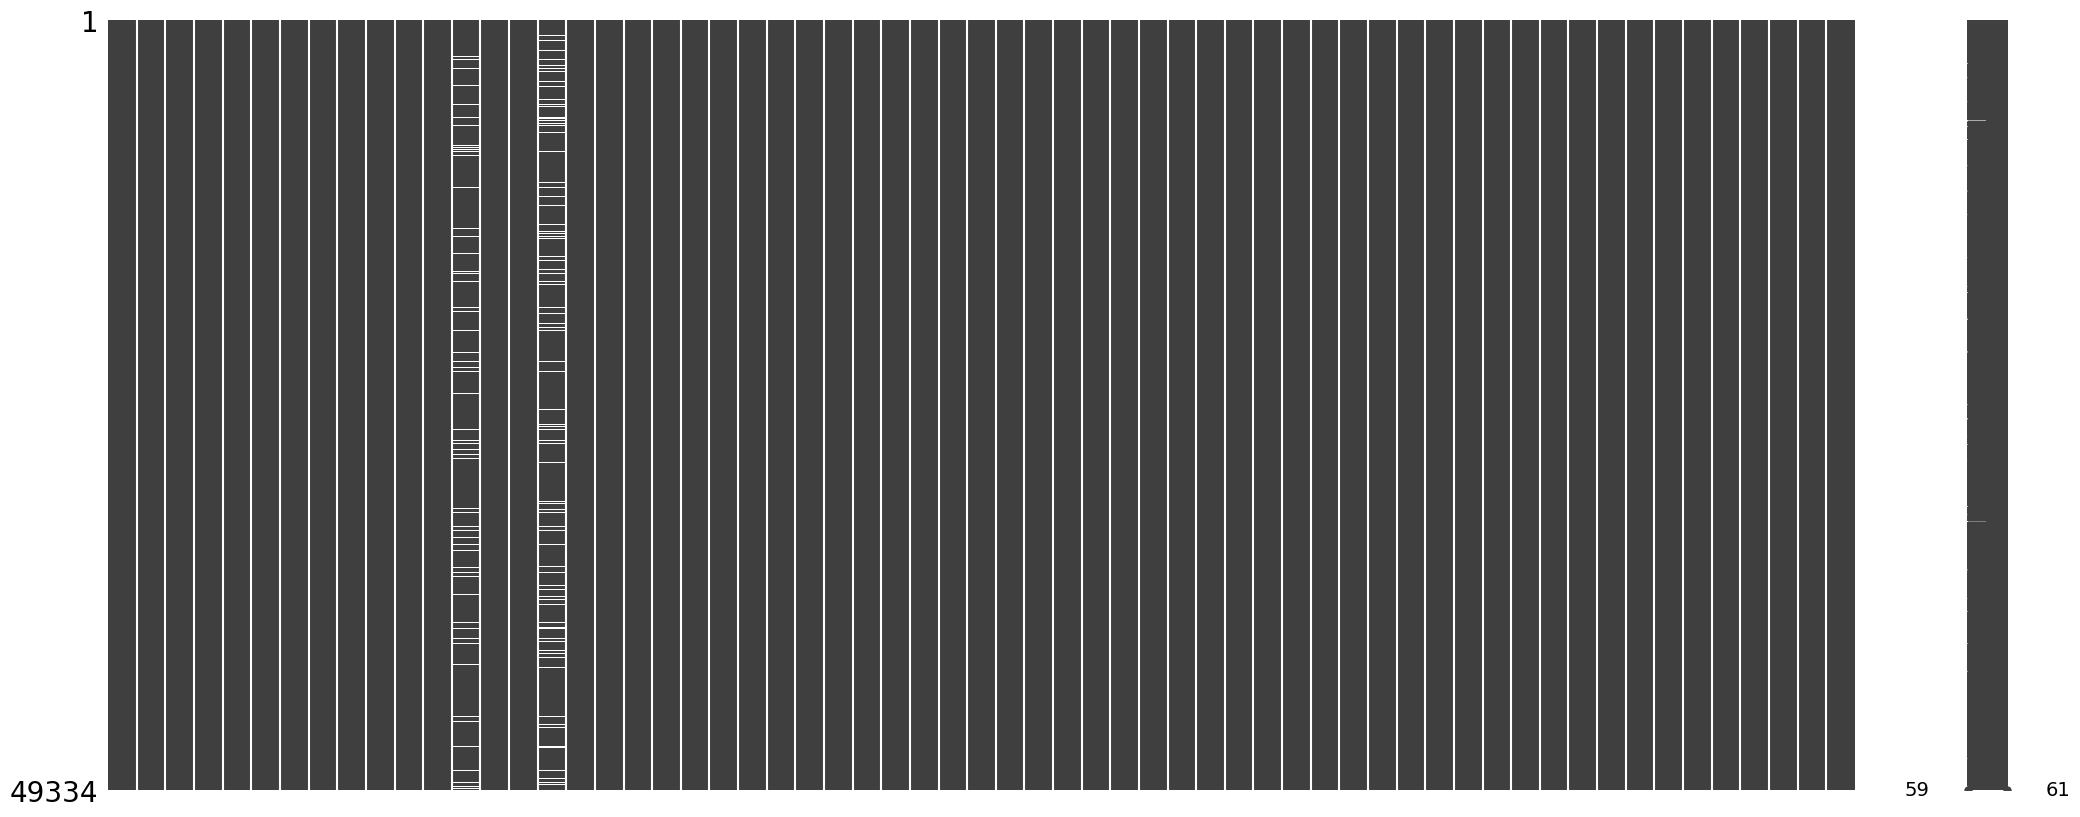

In [193]:
msno.matrix(Datasets_ML_df_ML_promedios_Final)

In [194]:
Datasets_ML_df_ML_promedios_Final.isnull().sum()

business_id                              0
name                                     0
address                                  0
city                                     0
state                                    0
postal_code                              0
latitude                                 0
longitude                                0
stars                                    0
review_count                             0
is_open                                  0
RestaurantsTakeOut                       0
BusinessParking                       3707
BusinessAcceptsCreditCards               0
RestaurantsDelivery                      0
RestaurantsPriceRange2                5231
OutdoorSeating                           0
BikeParking                              0
RestaurantsReservations                  0
WiFi                                     0
HasTV                                    0
Monday                                   0
Tuesday                                  0
Wednesday  

In [195]:
# Lista de columnas que deseas rellenar con 0
columnas_a_rellenar = ['stars', 'review_count', 'is_open', 'RestaurantsTakeOut', 'BusinessParking', 
                       'BusinessAcceptsCreditCards', 'RestaurantsDelivery', 'RestaurantsPriceRange2', 
                       'OutdoorSeating', 'BikeParking', 'RestaurantsReservations', 'WiFi', 'HasTV', 
                       'average_stars', 'total_sentimientos', 'promedio_sentimientos_positivos', 
                       'promedio_sentimientos_negativos', 'Promedio_useful', 'Promedio_funny', 'Promedio_cool', 
                       'total_sentimientosTip', 'promedio_sentimientos_positivosTip', 
                       'promedio_sentimientos_negativosTip', 'promedio_compliment_count_Tip', 
                       'A_M_Monday', 'A_T_Monday', 'A_N_Monday', 'A_M_Tuesday', 'A_T_Tuesday', 'A_N_Tuesday', 
                       'A_M_Wednesday', 'A_T_Wednesday', 'A_N_Wednesday', 'A_M_Thursday', 'A_T_Thursday', 
                       'A_N_Thursday', 'A_M_Friday', 'A_T_Friday', 'A_N_Friday', 'A_M_Saturday', 'A_T_Saturday', 
                       'A_N_Saturday', 'A_M_Sunday', 'A_T_Sunday', 'A_N_Sunday', 'Total_Horas_Semana']

# Rellenar los campos None con 0 en las columnas seleccionadas
Datasets_ML_df_ML_promedios_Final[columnas_a_rellenar] = Datasets_ML_df_ML_promedios_Final[columnas_a_rellenar].fillna(0)



In [196]:
Datasets_ML_df_ML_promedios_Final.describe(include = 'all')

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,RestaurantsTakeOut,BusinessParking,BusinessAcceptsCreditCards,RestaurantsDelivery,RestaurantsPriceRange2,OutdoorSeating,BikeParking,RestaurantsReservations,WiFi,HasTV,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,average_stars,total_sentimientos,promedio_sentimientos_positivos,promedio_sentimientos_negativos,Promedio_useful,Promedio_funny,Promedio_cool,total_sentimientosTip,promedio_sentimientos_positivosTip,promedio_sentimientos_negativosTip,promedio_compliment_count_Tip,A_M_Monday,A_T_Monday,A_N_Monday,A_M_Tuesday,A_T_Tuesday,A_N_Tuesday,A_M_Wednesday,A_T_Wednesday,A_N_Wednesday,A_M_Thursday,A_T_Thursday,A_N_Thursday,A_M_Friday,A_T_Friday,A_N_Friday,A_M_Saturday,A_T_Saturday,A_N_Saturday,A_M_Sunday,A_T_Sunday,A_N_Sunday,Total_Horas_Semana
count,49334,49334,49334,49334,49334,49334,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334,49334.000000,49334.000000,49334,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000,49334.000000
unique,49334,33625,41838,902,19,1985,NaN,NaN,NaN,NaN,NaN,NaN,159,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,MTSW4McQd7CbVtyjqoe9mw,McDonald's,,Philadelphia,PA,19107,NaN,NaN,NaN,NaN,NaN,NaN,"{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}",NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,620,206,5269,11023,583,NaN,NaN,NaN,NaN,NaN,NaN,18576,NaN,NaN,23962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,36.835069,-88.107477,3.576043,95.091296,0.715004,0.853549,NaN,0.889022,0.535452,NaN,0.375542,0.587343,0.254186,0.425021,0.549601,4.913335,6.958008,7.206413,7.166194,6.464290,6.226125,5.996349,3.573763,98.492743,0.826549,0.173451,1.091681,0.342616,0.514257,13.893583,0.634595,0.365405,0.012134,0.530364,0.083634,0.002696,0.718085,0.136539,0.003385,0.738213,0.156464,0.004378,0.745226,0.163478,0.005757,0.753497,0.159383,0.005959,0.728524,0.169579,0.005817,0.594357,0.184498,0.002878,44.930713
std,NaN,NaN,NaN,NaN,NaN,NaN,5.942042,13.956064,0.820654,194.142791,0.451417,0.353561,NaN,0.314108,0.498747,NaN,0.484268,0.492317,0.435407,0.494351,0.497539,7.059299,7.032791,7.041093,7.118316,7.987542,7.981895,6.793659,0.806162,199.230319,0.157754,0.157754,0.907926,0.470680,0.687443,28.154905,0.284374,0.284374,0.061055,0.499082,0.276841,0.051853,0.449937,0.343363,0.058084,0.439612,0.363298,0.066025,0.435738,0.369805,0.075655,0.430979,0.366037,0.076967,0.444726,0.375266,0.076051,0.491021,0.387893,0.053573,44.845631
min,NaN,NaN,NaN,NaN,NaN,NaN,27.564457,-120.083748,1.000000,5.000000,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,-23.500000,-23.500000,-23.500000,-23.500000,-23.500000,-23.500000,-23.750000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

<Axes: >

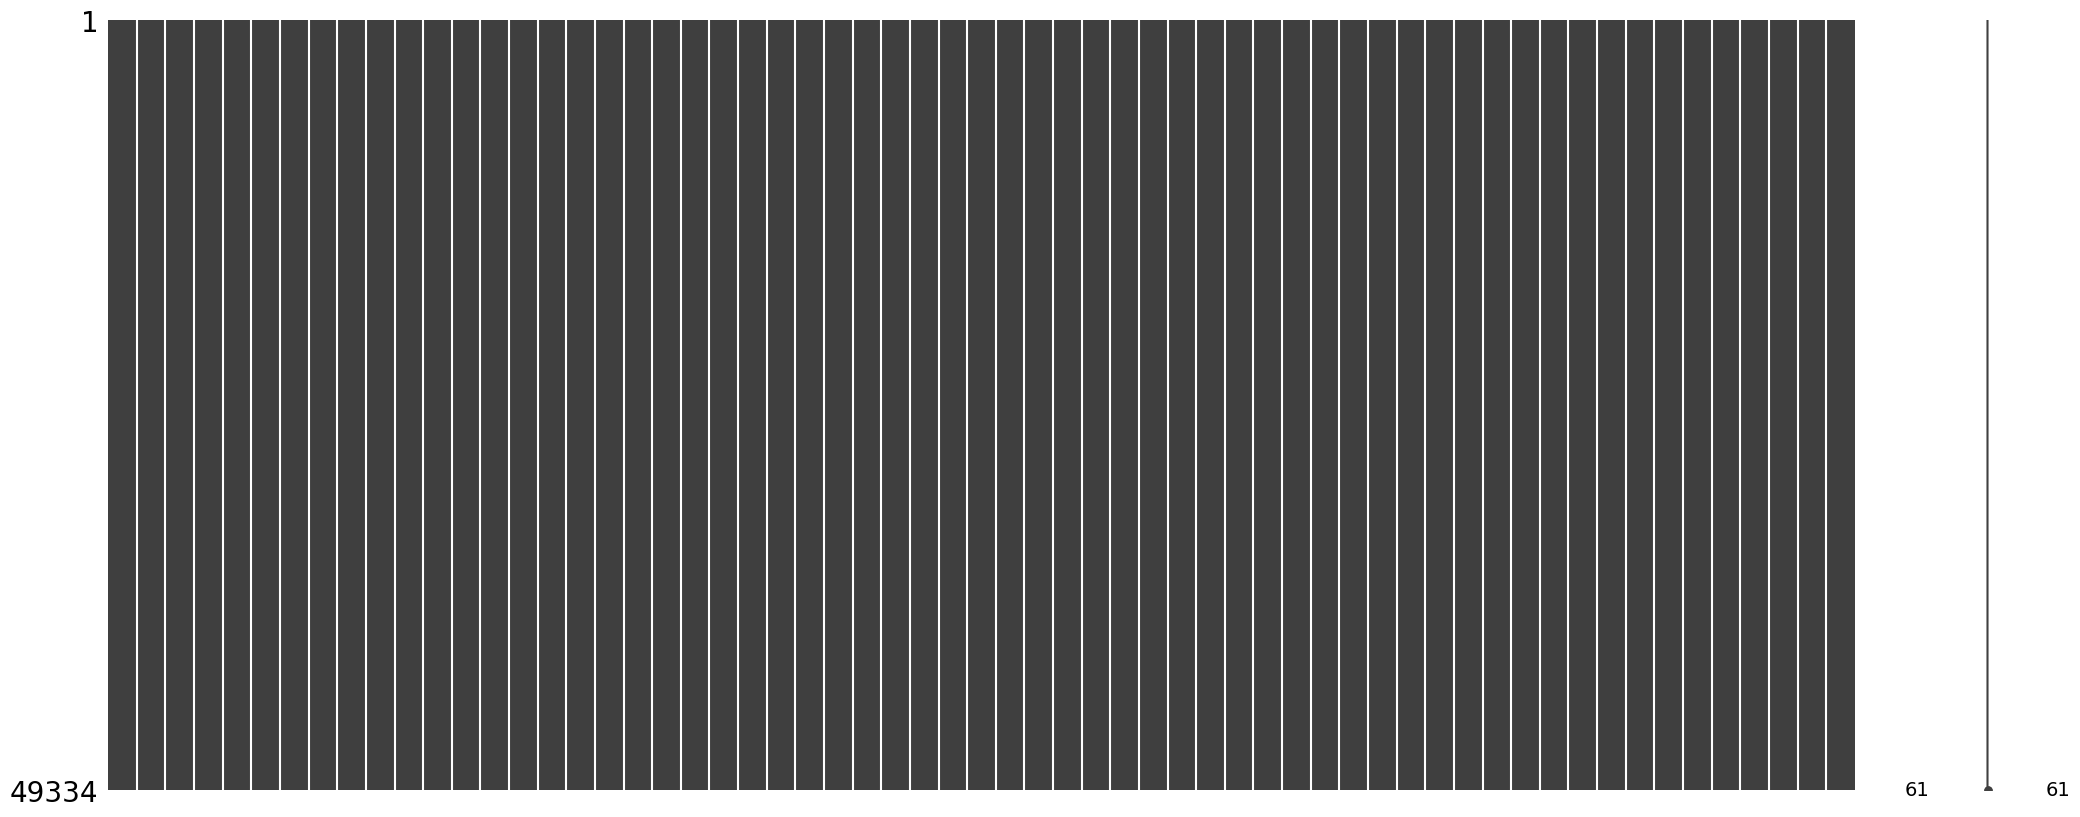

In [197]:
msno.matrix(Datasets_ML_df_ML_promedios_Final)

In [198]:
# sns.pairplot(Datasets_ML_df_ML_promedios_Final)

### Revisando correlaciones del dataset Datasets_ML_df_ML_promedios_Final completo:

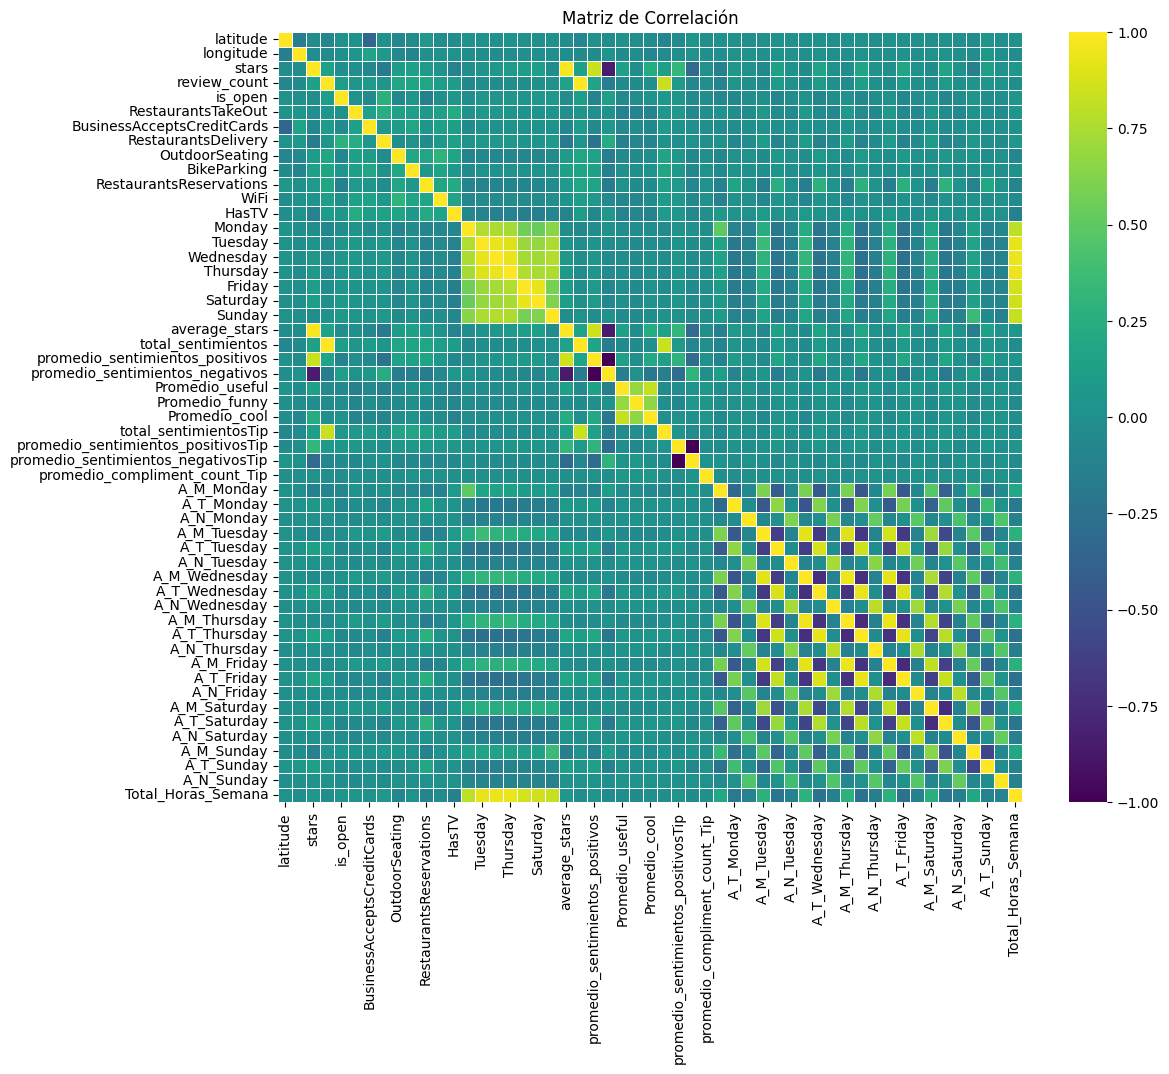

In [199]:
# Selecciona solo las columnas numéricas
columnas_numericas = Datasets_ML_df_ML_promedios_Final.select_dtypes(include=['number'])

# Calcula la matriz de correlación
matriz_correlacion = columnas_numericas.corr()

# Crea un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(matriz_correlacion, annot=False, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()


In [200]:
Datasets_ML_df_ML_promedios_Final.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,RestaurantsTakeOut,BusinessParking,BusinessAcceptsCreditCards,RestaurantsDelivery,RestaurantsPriceRange2,OutdoorSeating,BikeParking,RestaurantsReservations,WiFi,HasTV,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,average_stars,total_sentimientos,promedio_sentimientos_positivos,promedio_sentimientos_negativos,Promedio_useful,Promedio_funny,Promedio_cool,total_sentimientosTip,promedio_sentimientos_positivosTip,promedio_sentimientos_negativosTip,promedio_compliment_count_Tip,A_M_Monday,A_T_Monday,A_N_Monday,A_M_Tuesday,A_T_Tuesday,A_N_Tuesday,A_M_Wednesday,A_T_Wednesday,A_N_Wednesday,A_M_Thursday,A_T_Thursday,A_N_Thursday,A_M_Friday,A_T_Friday,A_N_Friday,A_M_Saturday,A_T_Saturday,A_N_Saturday,A_M_Sunday,A_T_Sunday,A_N_Sunday,Total_Horas_Semana
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4.0,80,1,1,"{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}",0,0,1,0,1,0,1,0,13.0,13.0,13.0,13.0,14.0,14.0,14.0,4.057471,87,0.942529,0.057471,1.505747,0.540230,1.091954,10,0.8,0.2,0.0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,94.0
1,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,MO,18054,40.338183,-75.471659,4.5,13,1,1,"{'garage': None, 'street': None, 'validated': None, 'lot': True, 'valet': False}",1,0,0,0,1,0,0,0,0.0,0.0,8.0,6.0,10.0,10.0,6.0,4.692308,13,0.923077,0.076923,0.153846,0.000000,0.000000,1,1.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,40.0
2,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,AZ,37015,36.269593,-87.058943,2.0,6,1,1,None,1,1,1,1,0,0,0,1,0.0,16.0,16.0,16.0,-9.0,13.0,14.0,2.166667,6,0.500000,0.500000,0.000000,0.000000,0.000000,2,0.5,0.5,0.0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,66.0
3,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,MO,37207,36.208102,-86.768170,1.5,10,1,1,"{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}",1,1,1,1,0,0,0,1,0.0,15.0,15.0,10.0,10.0,11.0,15.0,1.700000,10,0.700000,0.300000,0.200000,0.200000,0.000000,2,0.5,0.5,0.0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,76.0
4,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,MO,33602,27.955269,-82.456320,4.0,10,1,0,"{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}",0,0,0,0,0,0,0,0,3.0,3.0,3.0,3.0,3.0,5.0,3.0,4.090909,11,0.909091,0.090909,2.636364,0.454545,1.545455,1,1.0,0.0,0.0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,23.0


## Ahora Inner join con one hot por categorias:

Uno ambos dataframes para obtener categorias dentro del dataset a aplicar coseno similitud. complejizo el vector direccion para separar mas aun los datos

In [201]:
# Suponiendo que 'business_id' es la clave de unión
prom_final_y_one_hot = pd.merge(Datasets_ML_df_ML_promedios_Final, Datasets_ML_eda_yelp_business_one_hot, on='business_id', how='inner')


In [202]:
prom_final_y_one_hot.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,RestaurantsTakeOut,BusinessParking,BusinessAcceptsCreditCards,RestaurantsDelivery,RestaurantsPriceRange2,OutdoorSeating,BikeParking,RestaurantsReservations,WiFi,HasTV,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,average_stars,total_sentimientos,promedio_sentimientos_positivos,promedio_sentimientos_negativos,Promedio_useful,Promedio_funny,Promedio_cool,total_sentimientosTip,promedio_sentimientos_positivosTip,promedio_sentimientos_negativosTip,promedio_compliment_count_Tip,A_M_Monday,A_T_Monday,A_N_Monday,A_M_Tuesday,A_T_Tuesday,A_N_Tuesday,A_M_Wednesday,A_T_Wednesday,A_N_Wednesday,A_M_Thursday,A_T_Thursday,A_N_Thursday,A_M_Friday,A_T_Friday,A_N_Friday,A_M_Saturday,A_T_Saturday,A_N_Saturday,A_M_Sunday,A_T_Sunday,A_N_Sunday,Total_Horas_Semana,Restaurants,Food,Shopping,Beauty & Spas,Nightlife,Bars,Health & Medical,Home Services,Local Services,Event Planning & Services,Automotive,Sandwiches,American (Traditional),Active Life,Pizza,Coffee & Tea,Fast Food,Breakfast & Brunch,American (New),Burgers,Fashion,Home & Garden,Arts & Entertainment,Hair Salons,Auto Repair,Italian,Mexican,Nail Salons,Specialty Food,Hotels & Travel,Seafood,Doctors,Hair Removal,Chinese,Fitness & Instruction,Grocery,Desserts,Salad,Bakeries,Chicken Wings,Hotels,Real Estate,Cafes,Ice Cream & Frozen Yogurt,Skin Care,Caterers,Venues & Event Spaces,Wine & Spirits,Beer,Delis,Dentists,Waxing,Tires,Sports Bars,Professional Services,Women's Clothing,Oil Change Stations,Massage,Day Spas,Convenience Stores,General Dentistry,Japanese,Pubs,Flowers & Gifts,Home Decor,Gyms,Contractors,Sushi Bars,Cocktail Bars,Auto Parts & Supplies,Juice Bars & Smoothies,Barbeque,Barbers,Drugstores,Sporting Goods,Accessories,Cosmetic Dentists,Apartments,Furniture Stores,Asian Fusion,Steakhouses,Diners,Cosmetics & Beauty Supply,Jewelry,Education,Local Flavor,Department Stores,Hair Stylists,Trainers,Arts & Crafts,Electronics,Car Dealers,Massage Therapy,Mediterranean,Men's Clothing,Eyelash Service,Lounges,Wine Bars,Vegetarian,Music Venues,IT Services & Computer Repair,Donuts,Optometrists,Soup,Medical Centers,Laundry Services,Body Shops,Gas Stations,Pets,Dry Cleaning & Laundry,Shoe Stores,Tacos,Eyewear & Opticians,Southern,Thai,Music & Video,Mags,Books,Heating & Air Conditioning/HVAC,Food Delivery Services,Parks,Party & Event Planning,Tex-Mex,Cajun/Creole,Makeup Artists,Mobile Phones,Yoga,Building Supplies,Florists,Beer Bar,Food Trucks,Breweries,Vietnamese,Nurseries & Gardening,Discount Store,Indian,Plumbing,Vegan,Men's Hair Salons,Appliances,Chicken Shop,Latin American,Greek,Hardware Stores,Art Galleries,Gluten-Free,Gift Shops,Medical Spas,Hot Dogs,Sewing & Alterations,Printing Services,Car Wash,Vintage & Consignment,Comfort Food,Used,Bagels,Specialty Schools,Pet Services,Oral Surgeons,Public Services & Government,Auto Detailing,Kitchen & Bath,Self Storage,Chiropractors,Shipping Centers,Tobacco Shops,Endodontists,Movers,Ethnic Food,Tanning,Orthodontists,Dive Bars,Buffets,Auto Glass Services,Real Estate Services,Antiques,Cheesesteaks,Mattresses,Hair Extensions,Appliances & Repair,Property Management,Thrift Stores,Health Markets,Tattoo,Middle Eastern,Caribbean,Wedding Planning,Landscaping,Transmission Repair,Sports Wear,Meat Shops,Hobby Shops,Financial Services,Tours,Towing,Soul Food,Home Cleaning,Fruits & Veggies,Performing Arts,Bridal
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4.0,80,1,1,"{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}",0,0,1,0,1,0,1,0,13.0,13.0,13.0,13.0,14.0,14.0,14.0,4.057471,87,0.942529,0.057471,1.505747,0.540230,1.091954,10,0.8,0.2,0.0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,94.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

<Axes: >

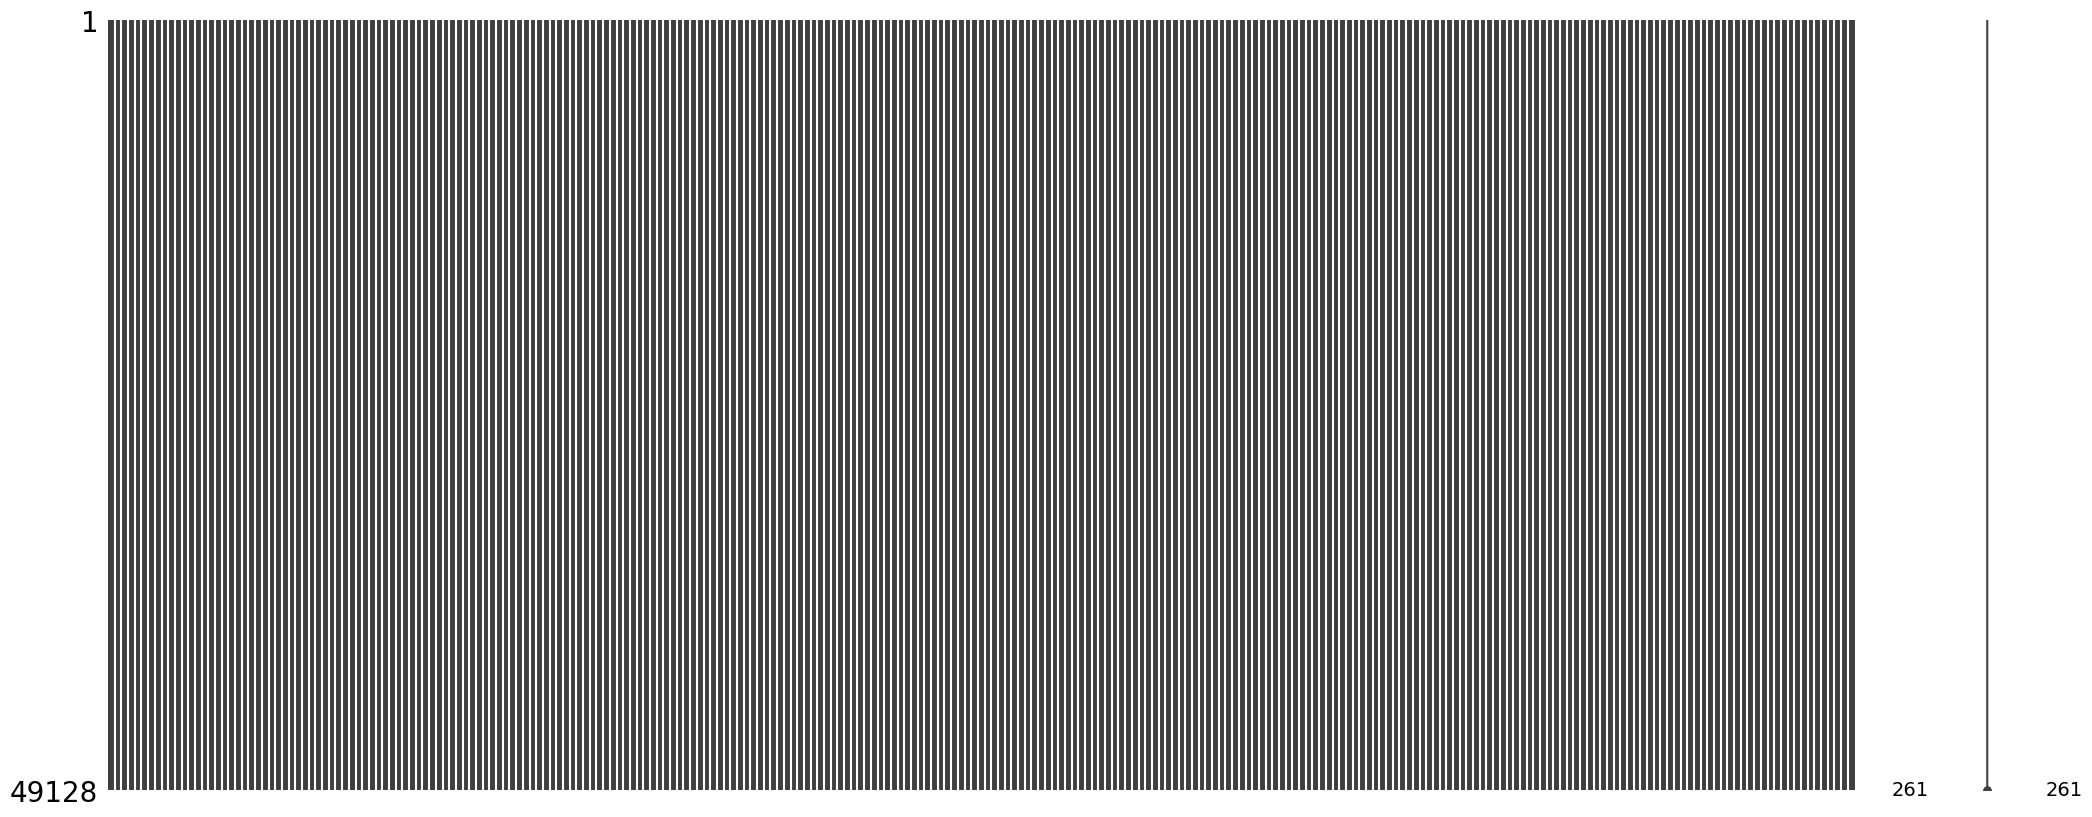

In [203]:
msno.matrix(prom_final_y_one_hot)

In [204]:
prom_final_y_one_hot.isnull().sum()

business_id                           0
name                                  0
address                               0
city                                  0
state                                 0
postal_code                           0
latitude                              0
longitude                             0
stars                                 0
review_count                          0
is_open                               0
RestaurantsTakeOut                    0
BusinessParking                       0
BusinessAcceptsCreditCards            0
RestaurantsDelivery                   0
RestaurantsPriceRange2                0
OutdoorSeating                        0
BikeParking                           0
RestaurantsReservations               0
WiFi                                  0
HasTV                                 0
Monday                                0
Tuesday                               0
Wednesday                             0
Thursday                              0


In [205]:
prom_final_y_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49128 entries, 0 to 49127
Columns: 261 entries, business_id to Bridal
dtypes: float64(20), int16(1), int64(231), int8(1), object(8)
memory usage: 97.2+ MB


In [206]:
column_types = {
    'business_id': 'string',
    'name': 'string',
    'address': 'string',
    'city': 'string',
    'state': 'string',
    'review_count': 'int32',
    'is_open': 'int32',
    'RestaurantsTakeOut': 'int32',
    'postal_code': 'string',
    'BusinessParking': 'string',
    'BusinessAcceptsCreditCards': 'int32',
    'RestaurantsDelivery': 'int32',
    'RestaurantsPriceRange2': 'int32',
    'OutdoorSeating': 'int32',
    'BikeParking': 'int32',
    'RestaurantsReservations': 'int32',
    'WiFi': 'int32',
    'HasTV': 'int32',
    'Monday': 'int32',
    'Tuesday': 'int32',
    'Wednesday': 'int32',
    'Thursday': 'int32',
    'Friday': 'int32',
    'Saturday': 'int32',
    'Sunday': 'int32',
    'total_sentimientos': 'int32',
    'total_sentimientosTip': 'int32',
    'promedio_sentimientos_positivos': 'float32',
    'promedio_sentimientos_negativos': 'float32',
    'Promedio_useful': 'float32',
    'Promedio_funny': 'float32',
    'Promedio_cool': 'float32',
    'promedio_compliment_count_Tip': 'float32',
    'A_M_Monday': 'int32',
    'A_T_Monday': 'int32',
    'A_N_Monday': 'int32',
    'A_M_Tuesday': 'int32',
    'A_T_Tuesday': 'int32',
    'A_N_Tuesday': 'int32',
    'A_M_Wednesday': 'int32',
    'A_T_Wednesday': 'int32',
    'A_N_Wednesday': 'int32',
    'A_M_Thursday': 'int32',
    'A_T_Thursday': 'int32',
    'A_N_Thursday': 'int32',
    'A_M_Friday': 'int32',
    'A_T_Friday': 'int32',
    'A_N_Friday': 'int32',
    'A_M_Saturday': 'int32',
    'A_T_Saturday': 'int32',
    'A_N_Saturday': 'int32',
    'A_M_Sunday': 'int32',
    'A_T_Sunday': 'int32',
    'A_N_Sunday': 'int32',
    'Total_Horas_Semana': 'int32',
}
# Reemplazar 'None' por un valor predeterminado, por ejemplo -1
prom_final_y_one_hot['RestaurantsPriceRange2'] = prom_final_y_one_hot['RestaurantsPriceRange2'].replace('None', -1)

# Convertir la columna al tipo int32
prom_final_y_one_hot['RestaurantsPriceRange2'] = prom_final_y_one_hot['RestaurantsPriceRange2'].astype('int32')

# Convertir columnas a tipos de datos especificados
prom_final_y_one_hot = prom_final_y_one_hot.astype(column_types)

In [207]:
prom_final_y_one_hot.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,RestaurantsTakeOut,BusinessParking,BusinessAcceptsCreditCards,RestaurantsDelivery,RestaurantsPriceRange2,OutdoorSeating,BikeParking,RestaurantsReservations,WiFi,HasTV,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,average_stars,total_sentimientos,promedio_sentimientos_positivos,promedio_sentimientos_negativos,Promedio_useful,Promedio_funny,Promedio_cool,total_sentimientosTip,promedio_sentimientos_positivosTip,promedio_sentimientos_negativosTip,promedio_compliment_count_Tip,A_M_Monday,A_T_Monday,A_N_Monday,A_M_Tuesday,A_T_Tuesday,A_N_Tuesday,A_M_Wednesday,A_T_Wednesday,A_N_Wednesday,A_M_Thursday,A_T_Thursday,A_N_Thursday,A_M_Friday,A_T_Friday,A_N_Friday,A_M_Saturday,A_T_Saturday,A_N_Saturday,A_M_Sunday,A_T_Sunday,A_N_Sunday,Total_Horas_Semana,Restaurants,Food,Shopping,Beauty & Spas,Nightlife,Bars,Health & Medical,Home Services,Local Services,Event Planning & Services,Automotive,Sandwiches,American (Traditional),Active Life,Pizza,Coffee & Tea,Fast Food,Breakfast & Brunch,American (New),Burgers,Fashion,Home & Garden,Arts & Entertainment,Hair Salons,Auto Repair,Italian,Mexican,Nail Salons,Specialty Food,Hotels & Travel,Seafood,Doctors,Hair Removal,Chinese,Fitness & Instruction,Grocery,Desserts,Salad,Bakeries,Chicken Wings,Hotels,Real Estate,Cafes,Ice Cream & Frozen Yogurt,Skin Care,Caterers,Venues & Event Spaces,Wine & Spirits,Beer,Delis,Dentists,Waxing,Tires,Sports Bars,Professional Services,Women's Clothing,Oil Change Stations,Massage,Day Spas,Convenience Stores,General Dentistry,Japanese,Pubs,Flowers & Gifts,Home Decor,Gyms,Contractors,Sushi Bars,Cocktail Bars,Auto Parts & Supplies,Juice Bars & Smoothies,Barbeque,Barbers,Drugstores,Sporting Goods,Accessories,Cosmetic Dentists,Apartments,Furniture Stores,Asian Fusion,Steakhouses,Diners,Cosmetics & Beauty Supply,Jewelry,Education,Local Flavor,Department Stores,Hair Stylists,Trainers,Arts & Crafts,Electronics,Car Dealers,Massage Therapy,Mediterranean,Men's Clothing,Eyelash Service,Lounges,Wine Bars,Vegetarian,Music Venues,IT Services & Computer Repair,Donuts,Optometrists,Soup,Medical Centers,Laundry Services,Body Shops,Gas Stations,Pets,Dry Cleaning & Laundry,Shoe Stores,Tacos,Eyewear & Opticians,Southern,Thai,Music & Video,Mags,Books,Heating & Air Conditioning/HVAC,Food Delivery Services,Parks,Party & Event Planning,Tex-Mex,Cajun/Creole,Makeup Artists,Mobile Phones,Yoga,Building Supplies,Florists,Beer Bar,Food Trucks,Breweries,Vietnamese,Nurseries & Gardening,Discount Store,Indian,Plumbing,Vegan,Men's Hair Salons,Appliances,Chicken Shop,Latin American,Greek,Hardware Stores,Art Galleries,Gluten-Free,Gift Shops,Medical Spas,Hot Dogs,Sewing & Alterations,Printing Services,Car Wash,Vintage & Consignment,Comfort Food,Used,Bagels,Specialty Schools,Pet Services,Oral Surgeons,Public Services & Government,Auto Detailing,Kitchen & Bath,Self Storage,Chiropractors,Shipping Centers,Tobacco Shops,Endodontists,Movers,Ethnic Food,Tanning,Orthodontists,Dive Bars,Buffets,Auto Glass Services,Real Estate Services,Antiques,Cheesesteaks,Mattresses,Hair Extensions,Appliances & Repair,Property Management,Thrift Stores,Health Markets,Tattoo,Middle Eastern,Caribbean,Wedding Planning,Landscaping,Transmission Repair,Sports Wear,Meat Shops,Hobby Shops,Financial Services,Tours,Towing,Soul Food,Home Cleaning,Fruits & Veggies,Performing Arts,Bridal
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4.0,80,1,1,"{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}",0,0,1,0,1,0,1,0,13,13,13,13,14,14,14,4.057471,87,0.942529,0.057471,1.505747,0.540230,1.091954,10,0.8,0.2,0.0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,94,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

#### Voy a tener que reordenar, normalizar, y ponderar columnas numericas...

In [208]:
# Calcular el producto de 'stars' y 'review_count' para cada fila
stars_review_product = prom_final_y_one_hot['stars'] * prom_final_y_one_hot['review_count']

# Filtrar solo las columnas numéricas excluyendo 'latitud' y 'longitud'
columnas_numericas = prom_final_y_one_hot.select_dtypes(include='number').drop(['latitude', 'longitude'], axis=1).columns

# Multiplicar cada valor numérico por el producto calculado solo en las columnas numéricas
prom_final_y_one_hot[columnas_numericas] = prom_final_y_one_hot[columnas_numericas].mul(stars_review_product, axis=0)

# Reintegrar las columnas 'latitud' y 'longitud' al DataFrame
prom_final_y_one_hot[['latitude', 'longitude']] = prom_final_y_one_hot[['latitude', 'longitude']]

# Concatenar 'stars_review_product' al DataFrame
prom_final_y_one_hot = pd.concat([prom_final_y_one_hot.drop(['latitude', 'longitude'], axis=1), stars_review_product.rename('stars_review_product')], axis=1)

In [ ]:
prom_final_y_one_hot.head(20)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,RestaurantsTakeOut,BusinessParking,BusinessAcceptsCreditCards,RestaurantsDelivery,RestaurantsPriceRange2,OutdoorSeating,BikeParking,RestaurantsReservations,WiFi,HasTV,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,average_stars,total_sentimientos,promedio_sentimientos_positivos,promedio_sentimientos_negativos,Promedio_useful,Promedio_funny,Promedio_cool,total_sentimientosTip,promedio_sentimientos_positivosTip,promedio_sentimientos_negativosTip,promedio_compliment_count_Tip,A_M_Monday,A_T_Monday,A_N_Monday,A_M_Tuesday,A_T_Tuesday,A_N_Tuesday,A_M_Wednesday,A_T_Wednesday,A_N_Wednesday,A_M_Thursday,A_T_Thursday,A_N_Thursday,A_M_Friday,A_T_Friday,A_N_Friday,A_M_Saturday,A_T_Saturday,A_N_Saturday,A_M_Sunday,A_T_Sunday,A_N_Sunday,Total_Horas_Semana,Restaurants,Food,Shopping,Beauty & Spas,Nightlife,Bars,Health & Medical,Home Services,Local Services,Event Planning & Services,Automotive,Sandwiches,American (Traditional),Active Life,Pizza,Coffee & Tea,Fast Food,Breakfast & Brunch,American (New),Burgers,Fashion,Home & Garden,Arts & Entertainment,Hair Salons,Auto Repair,Italian,Mexican,Nail Salons,Specialty Food,Hotels & Travel,Seafood,Doctors,Hair Removal,Chinese,Fitness & Instruction,Grocery,Desserts,Salad,Bakeries,Chicken Wings,Hotels,Real Estate,Cafes,Ice Cream & Frozen Yogurt,Skin Care,Caterers,Venues & Event Spaces,Wine & Spirits,Beer,Delis,Dentists,Waxing,Tires,Sports Bars,Professional Services,Women's Clothing,Oil Change Stations,Massage,Day Spas,Convenience Stores,General Dentistry,Japanese,Pubs,Flowers & Gifts,Home Decor,Gyms,Contractors,Sushi Bars,Cocktail Bars,Auto Parts & Supplies,Juice Bars & Smoothies,Barbeque,Barbers,Drugstores,Sporting Goods,Accessories,Cosmetic Dentists,Apartments,Furniture Stores,Asian Fusion,Steakhouses,Diners,Cosmetics & Beauty Supply,Jewelry,Education,Local Flavor,Department Stores,Hair Stylists,Trainers,Arts & Crafts,Electronics,Car Dealers,Massage Therapy,Mediterranean,Men's Clothing,Eyelash Service,Lounges,Wine Bars,Vegetarian,Music Venues,IT Services & Computer Repair,Donuts,Optometrists,Soup,Medical Centers,Laundry Services,Body Shops,Gas Stations,Pets,Dry Cleaning & Laundry,Shoe Stores,Tacos,Eyewear & Opticians,Southern,Thai,Music & Video,Mags,Books,Heating & Air Conditioning/HVAC,Food Delivery Services,Parks,Party & Event Planning,Tex-Mex,Cajun/Creole,Makeup Artists,Mobile Phones,Yoga,Building Supplies,Florists,Beer Bar,Food Trucks,Breweries,Vietnamese,Nurseries & Gardening,Discount Store,Indian,Plumbing,Vegan,Men's Hair Salons,Appliances,Chicken Shop,Latin American,Greek,Hardware Stores,Art Galleries,Gluten-Free,Gift Shops,Medical Spas,Hot Dogs,Sewing & Alterations,Printing Services,Car Wash,Vintage & Consignment,Comfort Food,Used,Bagels,Specialty Schools,Pet Services,Oral Surgeons,Public Services & Government,Auto Detailing,Kitchen & Bath,Self Storage,Chiropractors,Shipping Centers,Tobacco Shops,Endodontists,Movers,Ethnic Food,Tanning,Orthodontists,Dive Bars,Buffets,Auto Glass Services,Real Estate Services,Antiques,Cheesesteaks,Mattresses,Hair Extensions,Appliances & Repair,Property Management,Thrift Stores,Health Markets,Tattoo,Middle Eastern,Caribbean,Wedding Planning,Landscaping,Transmission Repair,Sports Wear,Meat Shops,Hobby Shops,Financial Services,Tours,Towing,Soul Food,Home Cleaning,Fruits & Veggies,Performing Arts,Bridal,stars_review_product
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,12785.761664,-24049.780512,1280.00,25600.0,320.0,320.0,"{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}",0.0,0.0,320.0,0.0,320.0,0.0,320.0,0.0,4160.0,4160.0,4160.0,4160.0,4480.0,4480.0,4480.0,1298.390805,27840.0,301.609192,18.390805,481.839066,172.873554,349.425278,3200.0,256.000000,64.000000,0.000000,320.0,0.0,0.0,320.0,0.0,0.0,320.0,0.0,0.0,320.0,0.0,0.0,320.0,0.0,0.0,320.0,0.0,0.0,320.0,0.0,0.0,30080.0,320.0,0.0,0.0,0.0,0.0,0.0,

## Guardo dataset prom_final_y_one_hot como parquet:

In [171]:
prom_final_y_one_hot.to_parquet('../../../ML_datasets/prom_final_y_one_hot.parquet')

## Aplicacion Cosine Similarity:

In [172]:
# Seleccionar un restaurante aleatorio del conjunto de datos
restaurante_aleatorio = prom_final_y_one_hot.sample(random_state=42)

# Seleccionar solo las columnas numéricas relevantes para el cálculo de similitud
columnas_numericas_relevantes = restaurante_aleatorio.select_dtypes(include='number').values

# Calcular la similitud del coseno con respecto a todos los restaurantes
similitud_coseno = cosine_similarity(columnas_numericas_relevantes, prom_final_y_one_hot.select_dtypes(include='number'))

# Obtener los índices de los 10 restaurantes más similares, incluyendo el índice 0
indices_similares = np.argsort(similitud_coseno[0])[::-1][:10]


# Mostrar el restaurante aleatorio y sus restaurantes más similares
print("Restaurante Aleatorio:")
print(restaurante_aleatorio)
print("\nRestaurantes Más Similares:")
print(prom_final_y_one_hot.iloc[indices_similares])



Restaurante Aleatorio:
                  business_id     name                    address   city  \
31779  kxJrNuvk_8mdy-fzoa3vTw  Wendy's  13712 Bruce B. Downs Blvd  Tampa   

      state postal_code     latitude    longitude   stars  review_count  \
31779    TN       33613  1754.539869 -5151.669512  156.25        1562.5   

       is_open  RestaurantsTakeOut  \
31779     62.5                62.5   

                                                                            BusinessParking  \
31779  {'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}   

       BusinessAcceptsCreditCards  RestaurantsDelivery  \
31779                        62.5                 62.5   

       RestaurantsPriceRange2  OutdoorSeating  BikeParking  \
31779                    62.5             0.0          0.0   

       RestaurantsReservations  WiFi  HasTV  Monday  Tuesday  Wednesday  \
31779                      0.0   0.0   62.5  -500.0   -500.0     -500.0   

       Thurs

In [173]:
# Calcular el porcentaje de similitud para los 10 restaurantes más similares
for i, indice in enumerate(indices_similares):
    similitud = similitud_coseno[0][indice]  # Obtener la similitud del coseno para el restaurante en el índice
    porcentaje_similitud = (similitud * 100).round(2)  # Convertir a porcentaje y redondear a 2 decimales
    print(f"Porcentaje de similitud con restaurante {indice}: {porcentaje_similitud}%")


Porcentaje de similitud con restaurante 31779: 100.0%
Porcentaje de similitud con restaurante 19502: 99.95%
Porcentaje de similitud con restaurante 22292: 99.95%
Porcentaje de similitud con restaurante 16065: 99.94%
Porcentaje de similitud con restaurante 3562: 99.92%
Porcentaje de similitud con restaurante 23627: 99.91%
Porcentaje de similitud con restaurante 21206: 99.9%
Porcentaje de similitud con restaurante 19692: 99.9%
Porcentaje de similitud con restaurante 676: 99.9%
Porcentaje de similitud con restaurante 13088: 99.9%


### Crear un DataFrame con los 10 restaurantes más similares

In [174]:
# Obtener los índices de los restaurantes más similares (top 10)
indices_10_similares = np.argsort(similitud_coseno[0])[::-1][1:11]  # Tomamos los primeros 10

# Crear un DataFrame con los 10 restaurantes más similares
restaurantes_similares = prom_final_y_one_hot.iloc[indices_10_similares]

# Mostrar el DataFrame con los 10 restaurantes más similares
print("Restaurantes Más Similares (Top 10):")
print(restaurantes_similares)


Restaurantes Más Similares (Top 10):
                  business_id                                      name  \
19502  J4xGzRAzhVb3T4NlEyjmCA                                   Wendy's   
22292  fe-29ty1XfKu3vZse-4IZA                                   Wendy's   
16065  GufJXz393fnNpQi_ba-YNA                                 Taco Bell   
3562   laElNpr0C23diPSsx12Nvg        Bobalouie's Grille & Sports Garden   
23627  mYwkkmabduKgDnbcb2ePJA                                   Wendy's   
21206  mvKlPMm5lje74U_dt2kMrA                                  Sur Real   
19692  XFdeSN_ufvr9UZQLdbjBfg  Under the Rose Brewing Company - Midtown   
676    1lC4dy6jlB2tBdBWbocO7Q                                   Wendy's   
13088  4B-LMwZKXcvHNLHXgr9v_w                                   Wendy's   
15611  kTnFZNMAzMkmWBd01k7qNA                                   Wendy's   

                           address              city state postal_code  \
19502     28031 Wesley Chapel Blvd     Wesley Chapel    FL     

In [177]:
restaurantes_similares.head(11)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,RestaurantsTakeOut,BusinessParking,BusinessAcceptsCreditCards,RestaurantsDelivery,RestaurantsPriceRange2,OutdoorSeating,BikeParking,RestaurantsReservations,WiFi,HasTV,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,average_stars,total_sentimientos,promedio_sentimientos_positivos,promedio_sentimientos_negativos,Promedio_useful,Promedio_funny,Promedio_cool,total_sentimientosTip,promedio_sentimientos_positivosTip,promedio_sentimientos_negativosTip,promedio_compliment_count_Tip,A_M_Monday,A_T_Monday,A_N_Monday,A_M_Tuesday,A_T_Tuesday,A_N_Tuesday,A_M_Wednesday,A_T_Wednesday,A_N_Wednesday,A_M_Thursday,A_T_Thursday,A_N_Thursday,A_M_Friday,A_T_Friday,A_N_Friday,A_M_Saturday,A_T_Saturday,A_N_Saturday,A_M_Sunday,A_T_Sunday,A_N_Sunday,Total_Horas_Semana,Restaurants,Food,Shopping,Beauty & Spas,Nightlife,Bars,Health & Medical,Home Services,Local Services,Event Planning & Services,Automotive,Sandwiches,American (Traditional),Active Life,Pizza,Coffee & Tea,Fast Food,Breakfast & Brunch,American (New),Burgers,Fashion,Home & Garden,Arts & Entertainment,Hair Salons,Auto Repair,Italian,Mexican,Nail Salons,Specialty Food,Hotels & Travel,Seafood,Doctors,Hair Removal,Chinese,Fitness & Instruction,Grocery,Desserts,Salad,Bakeries,Chicken Wings,Hotels,Real Estate,Cafes,Ice Cream & Frozen Yogurt,Skin Care,Caterers,Venues & Event Spaces,Wine & Spirits,Beer,Delis,Dentists,Waxing,Tires,Sports Bars,Professional Services,Women's Clothing,Oil Change Stations,Massage,Day Spas,Convenience Stores,General Dentistry,Japanese,Pubs,Flowers & Gifts,Home Decor,Gyms,Contractors,Sushi Bars,Cocktail Bars,Auto Parts & Supplies,Juice Bars & Smoothies,Barbeque,Barbers,Drugstores,Sporting Goods,Accessories,Cosmetic Dentists,Apartments,Furniture Stores,Asian Fusion,Steakhouses,Diners,Cosmetics & Beauty Supply,Jewelry,Education,Local Flavor,Department Stores,Hair Stylists,Trainers,Arts & Crafts,Electronics,Car Dealers,Massage Therapy,Mediterranean,Men's Clothing,Eyelash Service,Lounges,Wine Bars,Vegetarian,Music Venues,IT Services & Computer Repair,Donuts,Optometrists,Soup,Medical Centers,Laundry Services,Body Shops,Gas Stations,Pets,Dry Cleaning & Laundry,Shoe Stores,Tacos,Eyewear & Opticians,Southern,Thai,Music & Video,Mags,Books,Heating & Air Conditioning/HVAC,Food Delivery Services,Parks,Party & Event Planning,Tex-Mex,Cajun/Creole,Makeup Artists,Mobile Phones,Yoga,Building Supplies,Florists,Beer Bar,Food Trucks,Breweries,Vietnamese,Nurseries & Gardening,Discount Store,Indian,Plumbing,Vegan,Men's Hair Salons,Appliances,Chicken Shop,Latin American,Greek,Hardware Stores,Art Galleries,Gluten-Free,Gift Shops,Medical Spas,Hot Dogs,Sewing & Alterations,Printing Services,Car Wash,Vintage & Consignment,Comfort Food,Used,Bagels,Specialty Schools,Pet Services,Oral Surgeons,Public Services & Government,Auto Detailing,Kitchen & Bath,Self Storage,Chiropractors,Shipping Centers,Tobacco Shops,Endodontists,Movers,Ethnic Food,Tanning,Orthodontists,Dive Bars,Buffets,Auto Glass Services,Real Estate Services,Antiques,Cheesesteaks,Mattresses,Hair Extensions,Appliances & Repair,Property Management,Thrift Stores,Health Markets,Tattoo,Middle Eastern,Caribbean,Wedding Planning,Landscaping,Transmission Repair,Sports Wear,Meat Shops,Hobby Shops,Financial Services,Tours,Towing,Soul Food,Home Cleaning,Fruits & Veggies,Performing Arts,Bridal,stars_review_product
19502,J4xGzRAzhVb3T4NlEyjmCA,Wendy's,28031 Wesley Chapel Blvd,Wesley Chapel,FL,33543,1764.803002,-5147.024486,156.25,1562.5,62.5,62.5,"{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}",62.5,62.5,62.5,62.5,62.5,0.0,0.0,62.5,-500.0,-500.0,-500.0,-500.0,-437.5,-437.5,-500.0,162.500000,1562.5,32.499999,29.999999,12.500000,12.500000,2.500000,250.0,15.625000,46.875000,0.0,62.5,0.0,0.0,62.5,0.0,0.0,62.5,0.0,0.0,62.5,0.0,0.0,62.5,0.0,0.0,62.5,0.0,0.0,62.5,0.0,0.0,-3375.0,62.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [178]:
restaurante_aleatorio.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,RestaurantsTakeOut,BusinessParking,BusinessAcceptsCreditCards,RestaurantsDelivery,RestaurantsPriceRange2,OutdoorSeating,BikeParking,RestaurantsReservations,WiFi,HasTV,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,average_stars,total_sentimientos,promedio_sentimientos_positivos,promedio_sentimientos_negativos,Promedio_useful,Promedio_funny,Promedio_cool,total_sentimientosTip,promedio_sentimientos_positivosTip,promedio_sentimientos_negativosTip,promedio_compliment_count_Tip,A_M_Monday,A_T_Monday,A_N_Monday,A_M_Tuesday,A_T_Tuesday,A_N_Tuesday,A_M_Wednesday,A_T_Wednesday,A_N_Wednesday,A_M_Thursday,A_T_Thursday,A_N_Thursday,A_M_Friday,A_T_Friday,A_N_Friday,A_M_Saturday,A_T_Saturday,A_N_Saturday,A_M_Sunday,A_T_Sunday,A_N_Sunday,Total_Horas_Semana,Restaurants,Food,Shopping,Beauty & Spas,Nightlife,Bars,Health & Medical,Home Services,Local Services,Event Planning & Services,Automotive,Sandwiches,American (Traditional),Active Life,Pizza,Coffee & Tea,Fast Food,Breakfast & Brunch,American (New),Burgers,Fashion,Home & Garden,Arts & Entertainment,Hair Salons,Auto Repair,Italian,Mexican,Nail Salons,Specialty Food,Hotels & Travel,Seafood,Doctors,Hair Removal,Chinese,Fitness & Instruction,Grocery,Desserts,Salad,Bakeries,Chicken Wings,Hotels,Real Estate,Cafes,Ice Cream & Frozen Yogurt,Skin Care,Caterers,Venues & Event Spaces,Wine & Spirits,Beer,Delis,Dentists,Waxing,Tires,Sports Bars,Professional Services,Women's Clothing,Oil Change Stations,Massage,Day Spas,Convenience Stores,General Dentistry,Japanese,Pubs,Flowers & Gifts,Home Decor,Gyms,Contractors,Sushi Bars,Cocktail Bars,Auto Parts & Supplies,Juice Bars & Smoothies,Barbeque,Barbers,Drugstores,Sporting Goods,Accessories,Cosmetic Dentists,Apartments,Furniture Stores,Asian Fusion,Steakhouses,Diners,Cosmetics & Beauty Supply,Jewelry,Education,Local Flavor,Department Stores,Hair Stylists,Trainers,Arts & Crafts,Electronics,Car Dealers,Massage Therapy,Mediterranean,Men's Clothing,Eyelash Service,Lounges,Wine Bars,Vegetarian,Music Venues,IT Services & Computer Repair,Donuts,Optometrists,Soup,Medical Centers,Laundry Services,Body Shops,Gas Stations,Pets,Dry Cleaning & Laundry,Shoe Stores,Tacos,Eyewear & Opticians,Southern,Thai,Music & Video,Mags,Books,Heating & Air Conditioning/HVAC,Food Delivery Services,Parks,Party & Event Planning,Tex-Mex,Cajun/Creole,Makeup Artists,Mobile Phones,Yoga,Building Supplies,Florists,Beer Bar,Food Trucks,Breweries,Vietnamese,Nurseries & Gardening,Discount Store,Indian,Plumbing,Vegan,Men's Hair Salons,Appliances,Chicken Shop,Latin American,Greek,Hardware Stores,Art Galleries,Gluten-Free,Gift Shops,Medical Spas,Hot Dogs,Sewing & Alterations,Printing Services,Car Wash,Vintage & Consignment,Comfort Food,Used,Bagels,Specialty Schools,Pet Services,Oral Surgeons,Public Services & Government,Auto Detailing,Kitchen & Bath,Self Storage,Chiropractors,Shipping Centers,Tobacco Shops,Endodontists,Movers,Ethnic Food,Tanning,Orthodontists,Dive Bars,Buffets,Auto Glass Services,Real Estate Services,Antiques,Cheesesteaks,Mattresses,Hair Extensions,Appliances & Repair,Property Management,Thrift Stores,Health Markets,Tattoo,Middle Eastern,Caribbean,Wedding Planning,Landscaping,Transmission Repair,Sports Wear,Meat Shops,Hobby Shops,Financial Services,Tours,Towing,Soul Food,Home Cleaning,Fruits & Veggies,Performing Arts,Bridal,stars_review_product
31779,kxJrNuvk_8mdy-fzoa3vTw,Wendy's,13712 Bruce B. Downs Blvd,Tampa,TN,33613,1754.539869,-5151.669512,156.25,1562.5,62.5,62.5,"{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}",62.5,62.5,62.5,0.0,0.0,0.0,0.0,62.5,-500.0,-500.0,-500.0,-500.0,-437.5,-437.5,-500.0,142.5,1562.5,37.500001,25.0,27.5,12.5,7.5,62.5,62.5,0.0,0.0,62.5,0.0,0.0,62.5,0.0,0.0,62.5,0.0,0.0,62.5,0.0,0.0,62.5,0.0,0.0,62.5,0.0,0.0,62.5,0.0,0.0,-3375.0,62.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [52]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd

# Crear un diccionario con valores ficticios para simular un nuevo negocio
nuevo_negocio = {
    'latitude': 40.0,
    'longitude': -75.0,
    'stars': 4.5,
    'review_count': 50,
    'is_open': 1,
    'RestaurantsTakeOut': 1,
    'BusinessAcceptsCreditCards': 1,
    'RestaurantsDelivery': 1,
    'RestaurantsPriceRange2': 2,
    'OutdoorSeating': 1,
    'BikeParking': 1,
    'RestaurantsReservations': 1,
    'WiFi': 1,
    'HasTV': 1,
    # ... incluir otras características relevantes ...
}

# Convertir el diccionario a un DataFrame
df_nuevo_negocio = pd.DataFrame([nuevo_negocio])

# Cargar el DataFrame con los datos de los negocios existentes (Datasets_ML_df_ML_promedios_Final)
# Asegúrate de tener cargado previamente el DataFrame con los datos existentes
# Datasets_ML_df_ML_promedios_Final = ...

# Seleccionar solo las columnas presentes tanto en el nuevo negocio como en los existentes
columnas_comunes = df_nuevo_negocio.columns.intersection(Datasets_ML_df_ML_promedios_Final.select_dtypes(include='number').columns)

# Filtrar el DataFrame del nuevo negocio y de los existentes
df_nuevo_negocio_filtrado = df_nuevo_negocio[columnas_comunes]
df_existente_filtrado = Datasets_ML_df_ML_promedios_Final[columnas_comunes]

# Calcular la similitud del coseno con respecto a todos los restaurantes
similitud_coseno_nuevo = cosine_similarity(df_nuevo_negocio_filtrado.values, df_existente_filtrado.fillna(0).values)

# Obtener los índices de los restaurantes más similares (top 10)
indices_10_similares_nuevo = np.argsort(similitud_coseno_nuevo[0])[::-1][1:11]  # Tomamos los primeros 10

# Crear un DataFrame con los 10 restaurantes más similares al negocio ficticio
restaurantes_similares_nuevo = Datasets_ML_df_ML_promedios_Final.iloc[indices_10_similares_nuevo].reset_index(drop=True)



In [53]:
# Mostrar el DataFrame con los 10 restaurantes más similares
print("Negocio Ficticio:")
print(df_nuevo_negocio_filtrado)
print("\nRestaurantes Más Similares al Negocio Ficticio (Top 10):")
print(restaurantes_similares_nuevo)

Negocio Ficticio:
   latitude  longitude  stars  review_count  is_open  RestaurantsTakeOut  \
0      40.0      -75.0    4.5            50        1                   1   

   BusinessAcceptsCreditCards  RestaurantsDelivery  OutdoorSeating  \
0                           1                    1               1   

   BikeParking  RestaurantsReservations  WiFi  HasTV  
0            1                        1     1      1  

Restaurantes Más Similares al Negocio Ficticio (Top 10):
              business_id                           name  \
0  ntsN09UfQSlRWO37guMKMw               Riviera D'Italia   
1  gtlj72UOq-wOSuOfXOCWeg                Johnny Longhots   
2  7CWiFnqHCz5dP1OMixUuDA  Boyd's Cardinal Hollow Winery   
3  WVokxjYmNVU-AsFNV3loPw                     Ryan's Pub   
4  BtxUZn4d7yxsHwdlRq1dkw            Mount Airy Tap Room   
5  wnucEo99Xv80lLKLybkq3w     The Oaks Family Restaurant   
6  lbbkBktYRTfOXIm37zKdeg                  El Cuscatleco   
7  sS-8DvNTZJrMZgLib-Eq0A               

In [54]:
restaurantes_similares_nuevo.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,RestaurantsTakeOut,BusinessParking,BusinessAcceptsCreditCards,RestaurantsDelivery,RestaurantsPriceRange2,OutdoorSeating,BikeParking,RestaurantsReservations,WiFi,HasTV,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,average_stars,total_sentimientos,promedio_sentimientos_positivos,promedio_sentimientos_negativos,Promedio_useful,Promedio_funny,Promedio_cool,total_sentimientosTip,promedio_sentimientos_positivosTip,promedio_sentimientos_negativosTip,promedio_compliment_count_Tip,A_M_Monday,A_T_Monday,A_N_Monday,A_M_Tuesday,A_T_Tuesday,A_N_Tuesday,A_M_Wednesday,A_T_Wednesday,A_N_Wednesday,A_M_Thursday,A_T_Thursday,A_N_Thursday,A_M_Friday,A_T_Friday,A_N_Friday,A_M_Saturday,A_T_Saturday,A_N_Saturday,A_M_Sunday,A_T_Sunday,A_N_Sunday,Total_Horas_Semana
0,ntsN09UfQSlRWO37guMKMw,Riviera D'Italia,1185 Easton Rd,Abington,NV,19001,40.124613,-75.132806,4.0,50,1,1,"{u'valet': False, u'garage': None, u'street': None, u'lot': None, u'validated': False}",1,1,2,0,1,1,1,1,11.0,11.0,11.0,11.0,12.0,23.0,10.5,4.018868,53,0.867925,0.132075,1.660377,0.226415,0.396226,7,0.428571,0.571429,0.0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,89.5
1,gtlj72UOq-wOSuOfXOCWeg,Johnny Longhots,1692 Clements Bridge Rd,Deptford Township,TN,08096,39.833127,-75.102579,4.0,50,1,1,"{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}",1,1,0,1,1,0,1,1,0.0,5.0,10.5,10.5,11.0,11.0,10.5,3.924528,53,0.811321,0.188679,0.603774,0.094340,0.358491,7,1.000000,0.000000,0.0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,58.5
2,7CWiFnqHCz5dP1OMixUuDA,Boyd's Cardinal Hollow Winery,1830 West Point Pike,West Point,PA,19486,40.207164,-75.298649,4.0,49,1,1,"{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}",1,1,2,1,1,1,1,1,6.0,6.0,6.0,6.0,8.0,8.0,6.0,3.903846,52,0.942308,0.057692,1.250000,0.057692,0.096154,2,0.500000,0.500000,0.0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,46.0
3,WVokxjYmNVU-AsFNV3loPw,Ryan's Pub,124 W Gay St,West Chester,FL,19380,39.959648,-75.606888,3.5,51,1,1,"{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}",1,1,2,1,1,1,1,1,-14.0,-14.0,-14.0,-18.0,-10.0,-10.0,-10.0,3.288462,52,0.865385,0.134615,0.884615,0.461538,0.307692,11,0.454545,0.545455,0.0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,-90.0
4,BtxUZn4d7yxsHwdlRq1dkw,Mount Airy Tap Room,300 W Mt Pleasant Ave,Philadelphia,PA,19119,40.053901,-75.194185,4.5,51,1,1,"{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}",1,1,2,1,1,0,1,1,5.0,5.0,5.0,5.0,5.0,5.0,9.0,4.557692,52,0.942308,0.057692,1.500000,0.115385,0.615385,6,0.666667,0.333333,0.0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,39.0


In [55]:
# Selecciona solo las columnas numéricas
columnas_numericas = restaurantes_similares_nuevo.select_dtypes(include='number')

# Calcula la matriz de correlación
matriz_correlacion = columnas_numericas.corr()

# Imprime la matriz de correlación
print(matriz_correlacion)


                                    latitude  longitude     stars  \
latitude                            1.000000  -0.048536  0.329220   
longitude                          -0.048536   1.000000 -0.083328   
stars                               0.329220  -0.083328  1.000000   
review_count                        0.052628  -0.342591  0.219512   
is_open                                  NaN        NaN       NaN   
RestaurantsTakeOut                       NaN        NaN       NaN   
BusinessAcceptsCreditCards               NaN        NaN       NaN   
RestaurantsDelivery                -0.721405  -0.050495 -0.156174   
OutdoorSeating                      0.159836  -0.399005  0.255031   
BikeParking                              NaN        NaN       NaN   
RestaurantsReservations             0.410278  -0.228312 -0.306719   
WiFi                                     NaN        NaN       NaN   
HasTV                                    NaN        NaN       NaN   
Monday                            

In [56]:
matriz_correlacion.isnull().sum()

latitude                              13
longitude                             13
stars                                 13
review_count                          13
is_open                               53
RestaurantsTakeOut                    53
BusinessAcceptsCreditCards            53
RestaurantsDelivery                   13
OutdoorSeating                        13
BikeParking                           53
RestaurantsReservations               13
WiFi                                  53
HasTV                                 53
Monday                                13
Tuesday                               13
Wednesday                             13
Thursday                              13
Friday                                13
Saturday                              13
Sunday                                13
average_stars                         13
total_sentimientos                    13
promedio_sentimientos_positivos       13
promedio_sentimientos_negativos       13
Promedio_useful 

<Axes: >

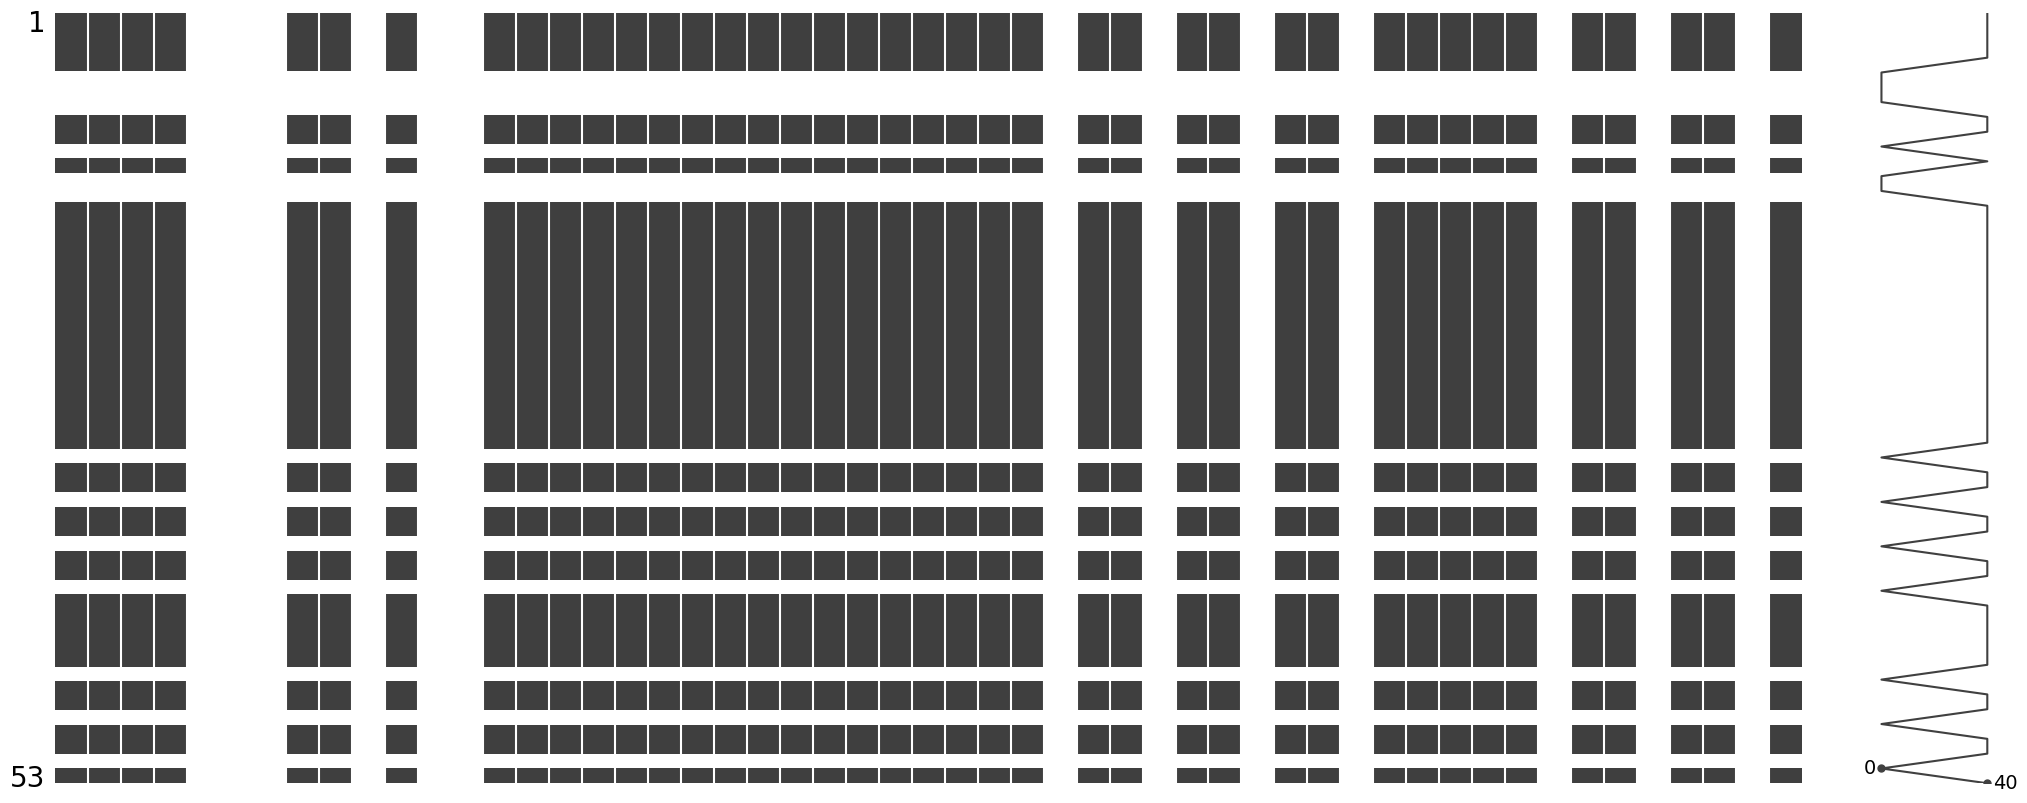

In [57]:
msno.matrix(matriz_correlacion)

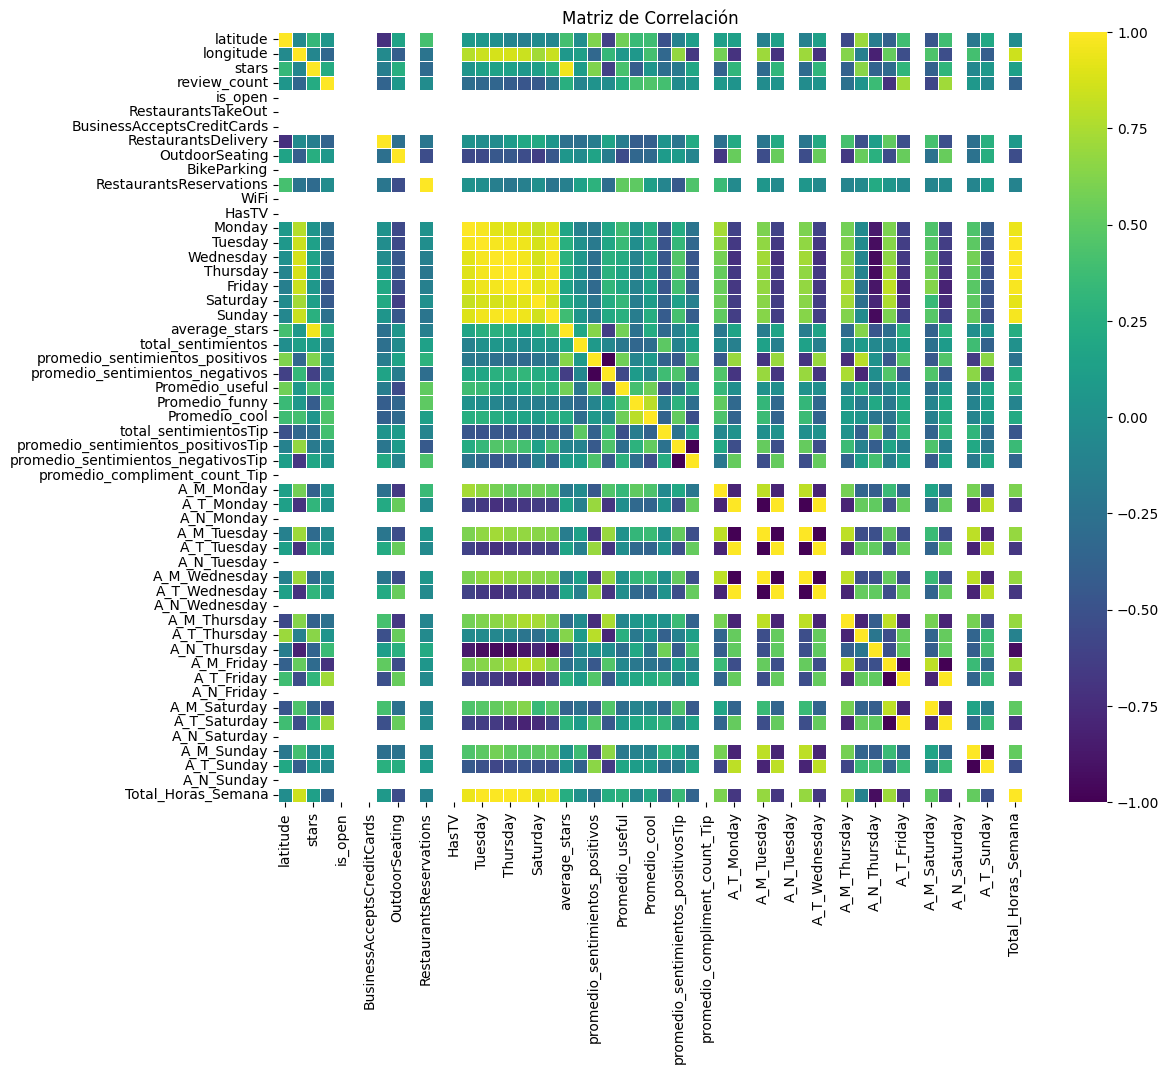

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grafica el mapa de calor de la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(matriz_correlacion, annot=False, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()


### Le agregaria tematicas, mexican food por ejemplo, mas columnas de clasificacion